In [1]:
%matplotlib inline


# Ringing artifact reduction example

This example shows how to subtract the impulse response from a filter to
reduce ringing artifacts.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter, lfilter

from meegkit.detrend import reduce_ringing

rng = np.random.default_rng(9)

# Detrending



## Basic example with a linear trend
Simulate the effect of filtering a signal containing a discontinuity, and try
to remove the resulting ringing artifact by subtracing the opposite of the
impulse response.



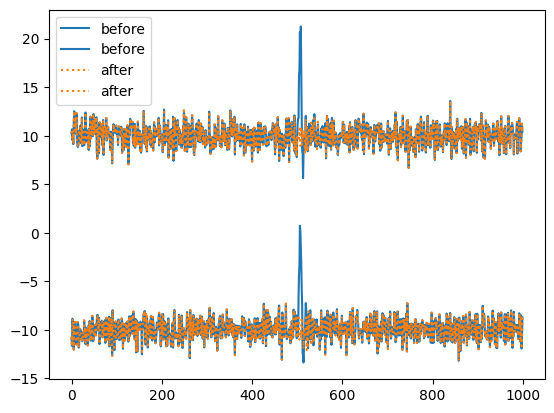

In [3]:
x = np.arange(1000) < 1
[b, a] = butter(6, 0.2)     # Butterworth filter design
x = lfilter(b, a, x) * 50    # Filter data using above filter
x = np.roll(x, 500)
x = x[:, None] + rng.standard_normal((1000, 2))
y = reduce_ringing(x, samples=np.array([500]))

plt.figure()
plt.plot(x + np.array([-10, 10]), "C0", label="before")
plt.plot(y + np.array([-10, 10]), "C1:", label="after")
plt.legend()
plt.show()